# <a id="homo">Statement :- Time Series Analysis on LandAverageTemperature dataset and forecast the future trend.</a>

#### Name of Students :-
##### 1. Suleman Sayyed
##### 2. Tanveer Mahammad Shikalgar 
##### 3. Akshay Nivrutti Vanjare

### <a id="homo">Import Required Libraries<a/>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 

### <a id="homo">Read the Data</a>

In [ ]:
df = pd.read_csv("GlobalLandTemperatures.csv", parse_dates = ["dt"], index_col = 'dt')

In [ ]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 224.4 KB


**Interpretation :-** In this data, there are 3192 rows and 8 columns. Also the data collected from 01-01-1750 to 01-12-2015.

In [ ]:
df.isna().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

**Interpretation :-**  30% data are missing in dataset. so we have to fill the missing values by mean, median or mode.

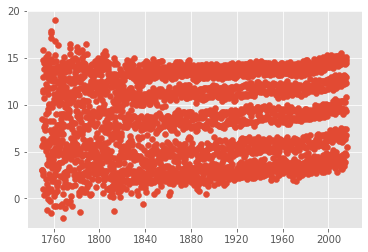

In [ ]:
plt.scatter(df.index, df["LandAverageTemperature"])
plt.show()

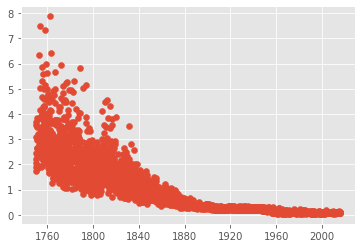

In [ ]:
plt.scatter(df.index, df["LandAverageTemperatureUncertainty"])
plt.show()

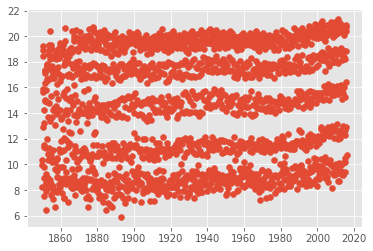

In [ ]:
plt.scatter(df.index, df["LandMaxTemperature"])
plt.show()

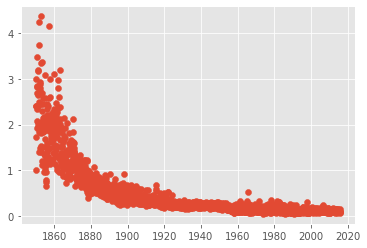

In [ ]:
plt.scatter(df.index, df["LandMaxTemperatureUncertainty"])
plt.show()

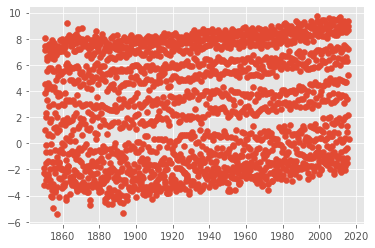

In [ ]:
plt.scatter(df.index, df["LandMinTemperature"])
plt.show()

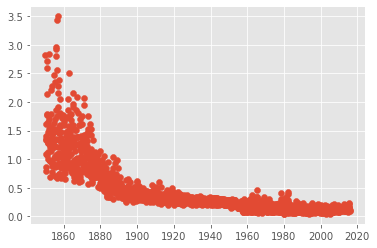

In [ ]:
plt.scatter(df.index, df["LandMinTemperatureUncertainty"])
plt.show()

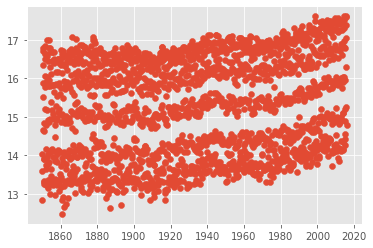

In [ ]:
plt.scatter(df.index, df["LandAndOceanAverageTemperature"])
plt.show()

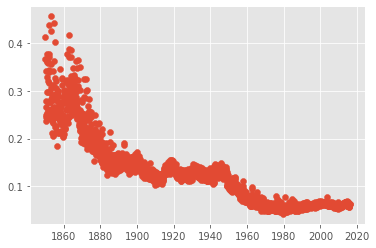

In [ ]:
plt.scatter(df.index, df["LandAndOceanAverageTemperatureUncertainty"])
plt.show()

**Interpretation :-** From all above graphs we can say that, for all columns all points are stated close so we are replace missing values by mean with respect to that column.

In [ ]:
df["LandAverageTemperature"] = df["LandAverageTemperature"].fillna(df["LandAverageTemperature"].mean())
 
df["LandAverageTemperatureUncertainty"] = df["LandAverageTemperatureUncertainty"].fillna(df["LandAverageTemperatureUncertainty"].mean())
 
df["LandMaxTemperature"] = df["LandMaxTemperature"].fillna(df["LandMaxTemperature"].mean())
 
df["LandMaxTemperatureUncertainty"] = df["LandMaxTemperatureUncertainty"].fillna(df["LandMaxTemperatureUncertainty"].mean())
 
df["LandMinTemperature"] = df["LandMinTemperature"].fillna(df["LandMinTemperature"].mean())
 
df["LandMinTemperatureUncertainty"] = df["LandMinTemperatureUncertainty"].fillna(df["LandMinTemperatureUncertainty"].mean())
 
df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].fillna(df["LandAndOceanAverageTemperature"].mean())
 
df["LandAndOceanAverageTemperatureUncertainty"] = df["LandAndOceanAverageTemperatureUncertainty"].fillna(df["LandAndOceanAverageTemperatureUncertainty"].mean())

In [ ]:
df.isna().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

**Interpretation :-** Now we have zero missing values. and that's important for time series analysis.

### <a id="homo">Graphical Visualisation of Data</a>

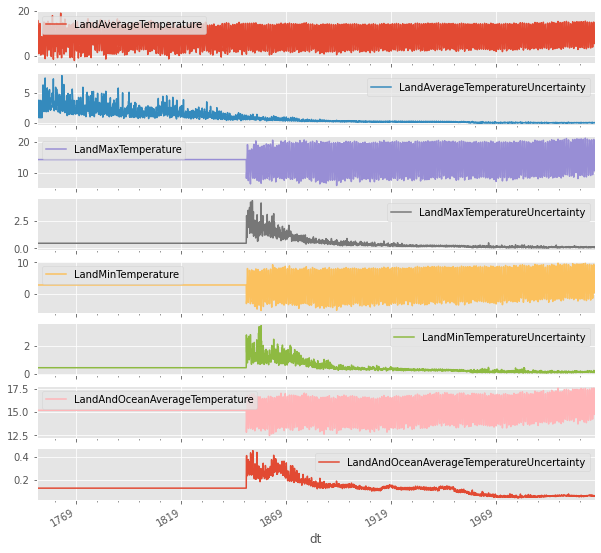

In [ ]:
df.plot(subplots = True,figsize = (10,10))
plt.show()

**Interpretation :-** In the above figure, the graph is in straight line from year 1750 to year 1850. It happens because of missing values.

In [ ]:
fig = go.Figure([go.Scatter(x = df.index, 
                            y = df.LandAverageTemperature)])
fig.show()

In [ ]:
fig = px.bar(df, x = df.index, 
             y = "LandAverageTemperature")
fig.show()

In [ ]:
fig = px.line(df, x = df.index, 
              y = df.LandAverageTemperature, 
              title = 'Custum Tick Labels')
fig.update_xaxes(dtick = "M1")
fig.show()

### <a id="homo">Decomposition</a>

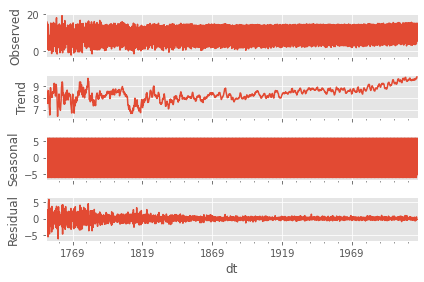

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df["LandAverageTemperature"], model = 'additive')
 
fig = decomposition.plot()

**Conclusion :-** We can see that the entire series is taken as the trend component and that there is same seasonality from start to end. We can also see that the residual plot between -5 to 5.

### <a id="homo">Stationarity</a>

Constant statistical properties -> mean, variance, std with does not change over time


H0 : It is Non Stationary
    
H1 : It is Stationary

        
P value > 0.05 Fail to reject null hypothesis -> Non Stationary 


P value < 0.05 it is Stationary

In [ ]:
output = adfuller(df["LandAverageTemperature"])
output

(-4.036039785872673,
 0.001233119577059826,
 29,
 3162,
 {'1%': -3.4324197712239393,
  '10%': -2.5672568084635663,
  '5%': -2.862454498112156},
 7457.668033159485)

In [ ]:
p_val = output[1]

In [ ]:
if p_val > 0.05:
    print("Non Stationary")
else:
    print("Stationary")

Stationary


**Conclusion :-** P value is 0.001. and from our hypothesis, P value is less than 0.05. so our data column is stationary

### <a id="homo">Moving Average</a>

In [ ]:
df_avgTemp = pd.DataFrame(df.iloc[:,0])

In [ ]:
df_avgTemp.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


#### 1. Simple Moving Average

In [ ]:
df_avgTemp["SMA_3"] = df_avgTemp["LandAverageTemperature"].rolling(window=3).mean()

In [ ]:
df_avgTemp

,LandAverageTemperature,SMA_3
dt,,
1750-01-01,3.034,NaN
1750-02-01,3.083,NaN
1750-03-01,5.626,3.914333
1750-04-01,8.490,5.733000
1750-05-01,11.573,8.563000
...,...,...
2015-08-01,14.755,14.770333
2015-09-01,12.999,14.268333
2015-10-01,10.801,12.851667


In [ ]:
df_avgTemp["SMA_4"] = df_avgTemp["LandAverageTemperature"].rolling(window=4).mean()

In [ ]:
df_avgTemp

,LandAverageTemperature,SMA_3,SMA_4
dt,,,
1750-01-01,3.034,NaN,NaN
1750-02-01,3.083,NaN,NaN
1750-03-01,5.626,3.914333,NaN
1750-04-01,8.490,5.733000,5.05825
1750-05-01,11.573,8.563000,7.19300
...,...,...,...
2015-08-01,14.755,14.770333,14.15575
2015-09-01,12.999,14.268333,14.32750
2015-10-01,10.801,12.851667,13.40150


In [ ]:
df_aT = df_avgTemp.head(100)

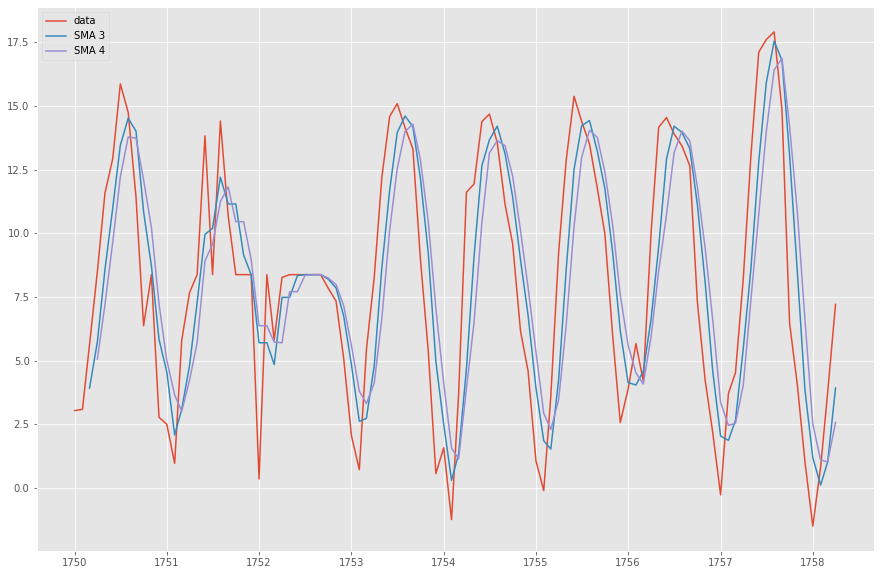

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_aT['LandAverageTemperature'], label = 'data')
plt.plot(df_aT['SMA_3'], label = 'SMA 3')
plt.plot(df_aT['SMA_4'], label = 'SMA 4')
plt.legend(loc = 2)
plt.show()

**Interpretation :-** When the temperature is moving upward or downward, so is the moving average line, albeit with a lag. After a temperature turning point, the temperature crosses the moving average line. At the V-shaped bottom on the preceding figure, for example, temperature are below the line until the gap (ellipse), and then temperature cross above the line.

#### 2. Cumulative Moving Average

In [ ]:
df_avgTemp['CMA_4'] = df_avgTemp["LandAverageTemperature"].expanding(min_periods = 4).mean()

In [ ]:
df_avgTemp

,LandAverageTemperature,SMA_3,SMA_4,CMA_4
dt,,,,
1750-01-01,3.034,NaN,NaN,NaN
1750-02-01,3.083,NaN,NaN,NaN
1750-03-01,5.626,3.914333,NaN,NaN
1750-04-01,8.490,5.733000,5.05825,5.058250
1750-05-01,11.573,8.563000,7.19300,6.361200
...,...,...,...,...
2015-08-01,14.755,14.770333,14.15575,8.373711
2015-09-01,12.999,14.268333,14.32750,8.375161
2015-10-01,10.801,12.851667,13.40150,8.375922


In [ ]:
df_aT_cum = df_avgTemp.head(100)

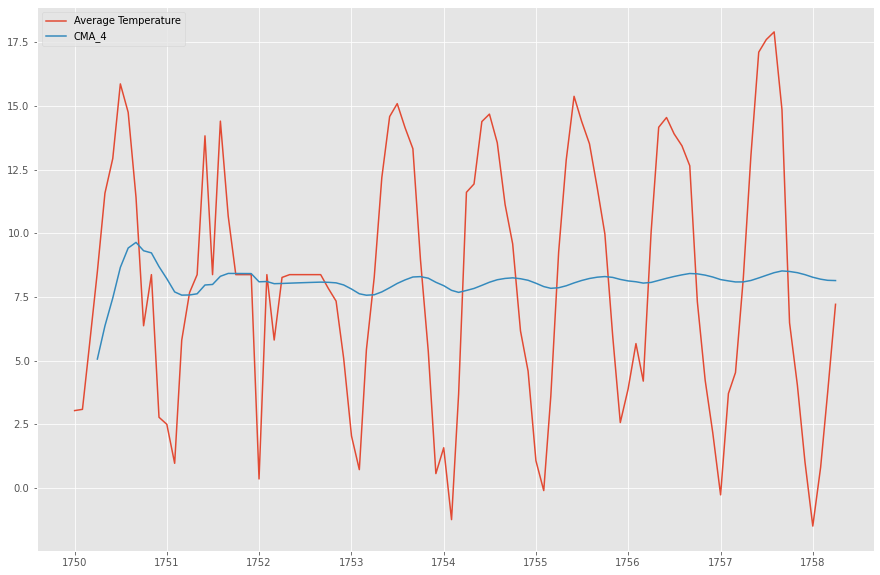

In [ ]:
plt.figure(figsize = [15,10])
plt.grid(True)
plt.plot(df_aT_cum['LandAverageTemperature'], label = 'Average Temperature')
plt.plot(df_aT_cum['CMA_4'], label = 'CMA_4')
plt.legend(loc = 2)
plt.show()

#### 3. Exponential Moving Average

In [ ]:
df_avgTemp['EMA'] = df_avgTemp["LandAverageTemperature"].ewm(span=40,adjust=False).mean()

In [ ]:
df_avgTemp

,LandAverageTemperature,SMA_3,SMA_4,CMA_4,EMA
dt,,,,,
1750-01-01,3.034,NaN,NaN,NaN,3.034000
1750-02-01,3.083,NaN,NaN,NaN,3.036390
1750-03-01,5.626,3.914333,NaN,NaN,3.162713
1750-04-01,8.490,5.733000,5.05825,5.058250,3.422580
1750-05-01,11.573,8.563000,7.19300,6.361200,3.820162
...,...,...,...,...,...
2015-08-01,14.755,14.770333,14.15575,8.373711,10.017136
2015-09-01,12.999,14.268333,14.32750,8.375161,10.162593
2015-10-01,10.801,12.851667,13.40150,8.375922,10.193734


In [ ]:
df_aT_ema = df_avgTemp.head(100)

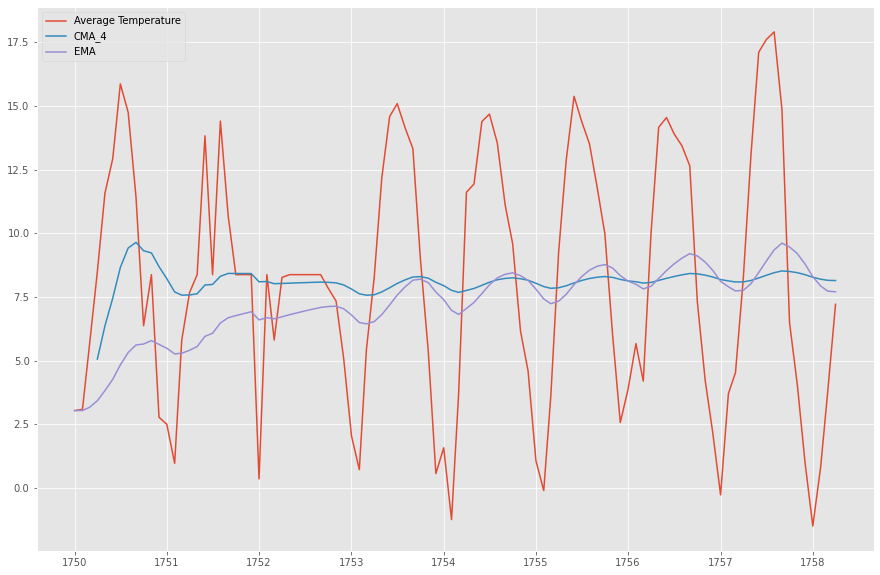

In [ ]:
plt.figure(figsize = [15,10])
plt.grid(True)
plt.plot(df_aT_ema['LandAverageTemperature'], label = 'Average Temperature')
plt.plot(df_aT_ema['CMA_4'], label = 'CMA_4')
plt.plot(df_aT_ema['EMA'], label = 'EMA')
plt.legend(loc = 2)
plt.show()

### <a id="homo">Auto Regression</a>

In [ ]:
df = df["LandAverageTemperature"]

**Conclusion :-** In this project, our main focus on Land Average Temperature, because we want to forecast Land Average Temperature for future, so that's why we select one column.

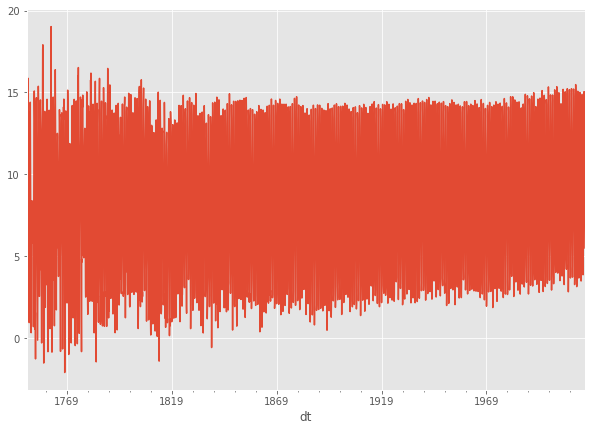

In [ ]:
plt.rcParams['figure.figsize']=(10,7)
plt.style.use('ggplot')

df.plot()
plt.show()

**Conclusion :-** graph shows that whole data points lise between the 0 to 15. but sometimes for year 1770 it's goes high and also goes down the zero.

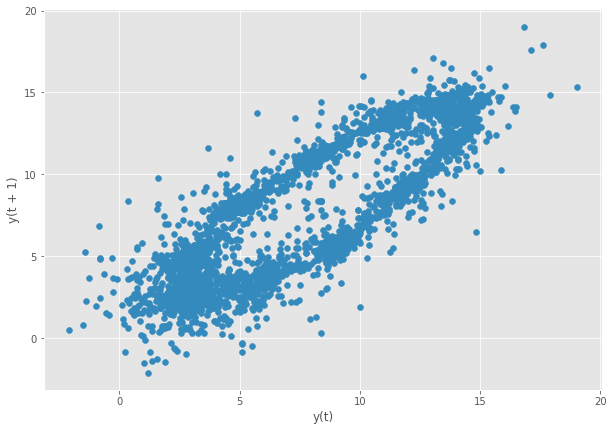

In [ ]:
pd.plotting.lag_plot(df)
plt.show()

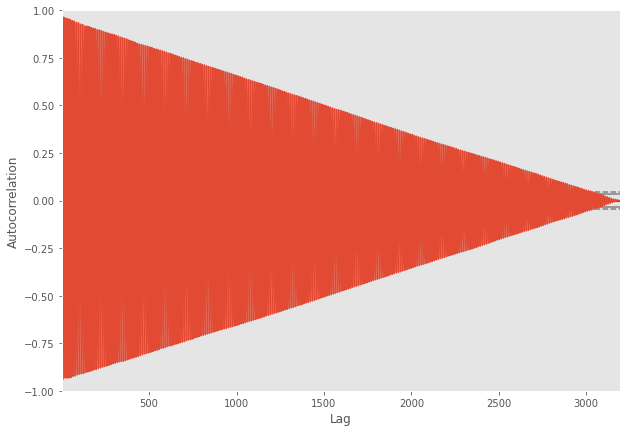

In [ ]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [ ]:
model = AR(df)

model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
print('The lag value chose is: %s' % model_fit.k_ar)

print('The coefficients of the model are:\n %s' % model_fit.params)

The lag value chose is: 29
The coefficients of the model are:
 const                         0.881397
L1.LandAverageTemperature     0.404223
L2.LandAverageTemperature     0.093370
L3.LandAverageTemperature     0.000443
L4.LandAverageTemperature    -0.104205
L5.LandAverageTemperature    -0.054776
L6.LandAverageTemperature    -0.036547
L7.LandAverageTemperature     0.031555
L8.LandAverageTemperature    -0.000573
L9.LandAverageTemperature     0.038456
L10.LandAverageTemperature    0.046108
L11.LandAverageTemperature    0.055164
L12.LandAverageTemperature    0.167969
L13.LandAverageTemperature    0.061250
L14.LandAverageTemperature   -0.033238
L15.LandAverageTemperature    0.015883
L16.LandAverageTemperature   -0.011632
L17.LandAverageTemperature    0.045604
L18.LandAverageTemperature    0.041991
L19.LandAverageTemperature   -0.017348
L20.LandAverageTemperature   -0.070361
L21.LandAverageTemperature    0.055874
L22.LandAverageTemperature    0.049755
L23.LandAverageTemperature    0.078548
L

**Conclusion :-** The model choosing the 29 lag value.

In [ ]:
pred = model_fit.predict()

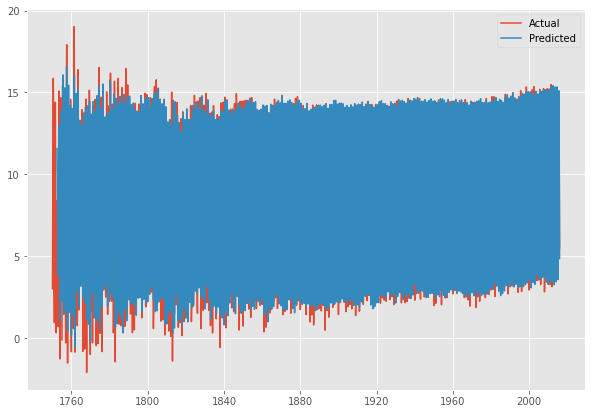

In [ ]:
plt.plot(df,label="Actual")
plt.plot(pred,label="Predicted")
plt.legend()
plt.show()

**Conclusion :-** Here we can see the Actual temperatures and Predicted temperatures are almost same for all year.

In [ ]:
residual=model_fit.resid

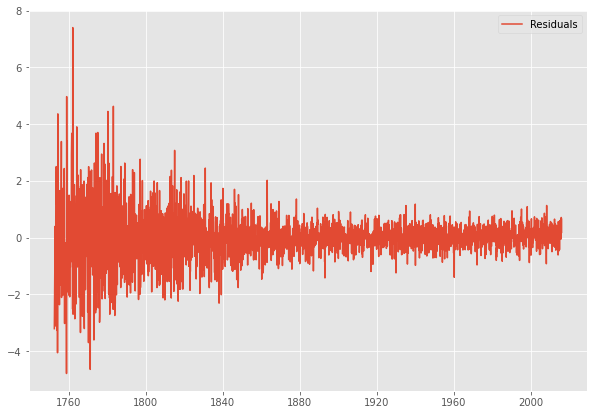

In [ ]:
plt.plot(residual, label = "Residuals")
plt.legend()
plt.show()

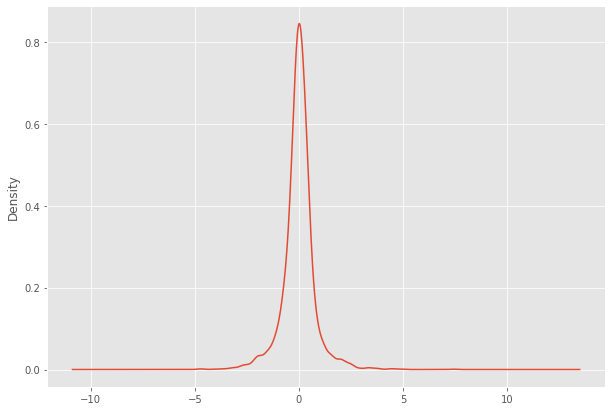

In [ ]:
residual.plot(kind="kde")
plt.show()

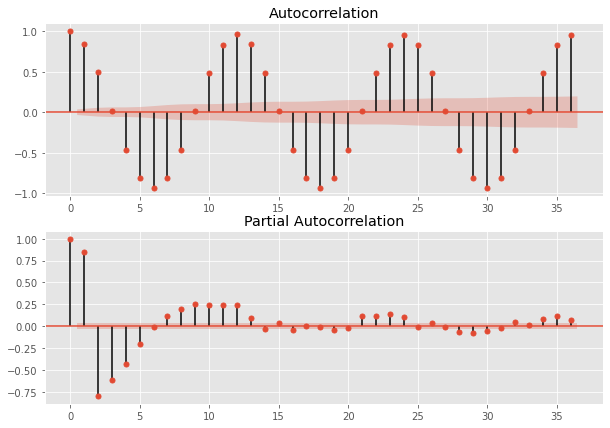

In [ ]:
fig, axs = plt.subplots(2)

axs[0].set_title("ACF plot")
plot_acf(df, ax = axs[0])

axs[1].set_title("PACF plot")
plot_pacf(df, ax = axs[1])

plt.show()

### <a id="homo">ARIMA</a>

In [ ]:
auto_model = auto_arima(df, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8966.142, Time=5.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14689.182, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12872.363, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13537.798, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14687.182, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12844.370, Time=1.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8439.487, Time=6.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8526.038, Time=9.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8045.200, Time=6.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12193.044, Time=2.57 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=9.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, 

**Conclusion :-** Auto arima gives us p, d, and q values for ARIMA. and find out p,d, and q value manually is quite difficult.
Here;
p = 2,
d = 1,
q = 5.

In [ ]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3192
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -3860.039
Date:                Sun, 02 May 2021   AIC                           7736.078
Time:                        03:57:15   BIC                           7784.623
Sample:                             0   HQIC                          7753.485
                               - 3192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7319      0.000   1.13e+04      0.000       1.732       1.732
ar.L2         -0.9997      0.000  -8572.650      0.000      -1.000      -0.999
ma.L1         -2.4160      0.008   -288.842      0.000      -2.432      -2.400
ma.L2          2.0676      0.022     92.084      0.000       2.024       2.112
ma.L3         -0.6345      0.030    -21.223      0.000      -0.693      -0.576
ma.L4          0.1153      0.025      4.698      0.000       0.067       0.163
ma.L5         -0.1265      0.009    -13.574      0.000      -0.145      -0.108
sigma2         0.6379      0.007     87.605      0.000       0.624       0.652
===================================================================================
Ljung-Box (Q):                      182.11   Jarque-Bera (JB):              8978.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <a id="homo">Splitting Data into Train and Test</a>

In [ ]:
df.shape

(3192,)

In [ ]:
train_len = int(0.8 * len(df))
train_len

2553

In [ ]:
train = df[:train_len]
train.shape

(2553,)

In [ ]:
train

dt
1750-01-01     3.034
1750-02-01     3.083
1750-03-01     5.626
1750-04-01     8.490
1750-05-01    11.573
               ...  
1962-05-01    11.128
1962-06-01    13.427
1962-07-01    14.205
1962-08-01    13.713
1962-09-01    12.018
Name: LandAverageTemperature, Length: 2553, dtype: float64

In [ ]:
test = df[train_len:]
test.shape

(639,)

In [ ]:
test

dt
1962-10-01     9.468
1962-11-01     6.283
1962-12-01     3.940
1963-01-01     2.901
1963-02-01     4.020
               ...  
2015-08-01    14.755
2015-09-01    12.999
2015-10-01    10.801
2015-11-01     7.433
2015-12-01     5.518
Name: LandAverageTemperature, Length: 639, dtype: float64

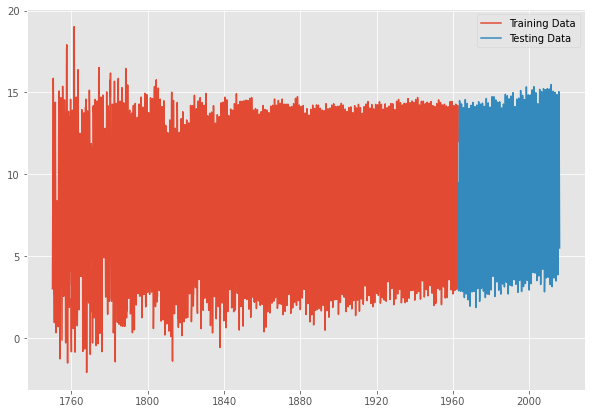

In [ ]:
plt.plot(train, label = "Training Data")
plt.plot(test, label = "Testing Data")
plt.legend()
plt.show()

In [ ]:
# make a model 
 
model = ARIMA(train, order =(2, 1, 5))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
model_fit = model.fit()
 
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt



<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.LandAverageTemperature   No. Observations:                 2552
Model:                       ARIMA(2, 1, 5)   Log Likelihood               -3322.455
Method:                             css-mle   S.D. of innovations              0.888
Date:                      Sun, 02 May 2021   AIC                           6662.909
Time:                              03:57:57   BIC                           6715.511
Sample:                          02-01-1750   HQIC                          6681.986
                               - 09-01-1962                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0002      0.001      0.250      0.802      -0.001       0.002
ar.L1.D.LandAverageTemperature     1.7318        nan        nan        nan         nan         nan
ar.L2.D.LandAverageTemperature    -0.9996        nan        nan        nan         nan         nan
ma.L1.D.LandAverageTemperature    -2.4163      0.019   -127.259      0.000      -2.454      -2.379
ma.L2.D.LandAverageTemperature     2.0618      0.054     38.515      0.000       1.957       2.167
ma.L3.D.LandAverageTemperature    -0.6083      0.071     -8.606      0.000      -0.747      -0.470
ma.L4.D.LandAverageTemperature     0.0868      0.055      1.591      0.112      -0.020       0.194
ma.L5.D.LandAverageTemperature    -0.1124      0.019     -5.827      0.000      -0.150      -0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8662           -0.5001j            1.0002           -0.0833
AR.2            0.8662           +0.5001j            1.0002            0.0833
MA.1            1.0337           -0.0000j            1.0337           -0.0000
MA.2            0.8858           -0.5101j            1.0221           -0.0832
MA.3            0.8858           +0.5101j            1.0221            0.0832
MA.4           -1.0164           -2.6841j            2.8701           -0.3076
MA.5           -1.0164           +2.6841j            2.8701            0.3076
-----------------------------------------------------------------------------
"""

**Interpretation :-** AIC = 6602 with model = ARIMA(2,1,5), Lower the AIC better the model.

In [ ]:
y_pred_train = model_fit.predict()
y_pred_train

1750-02-01    0.000194
1750-03-01    0.007188
1750-04-01    0.305939
1750-05-01    0.884255
1750-06-01    0.868201
                ...   
1962-05-01    2.744426
1962-06-01    2.341728
1962-07-01    1.004735
1962-08-01   -0.375569
1962-09-01   -1.830524
Freq: MS, Length: 2552, dtype: float64

In [ ]:
# predictions on test data set 
# start -> len(train) & end -> len(train) - len(test) - 1 or len(x)-1
y_pred_test = model_fit.predict(start = len(train), end = len(df)-1)
                        
y_pred_test

1962-10-01   -2.859188
1962-11-01   -2.921608
1962-12-01   -2.268351
1963-01-01   -0.982761
1963-02-01    0.550456
                ...   
2015-08-01   -0.466992
2015-09-01   -1.710221
2015-10-01   -2.494809
2015-11-01   -2.610738
2015-12-01   -2.027193
Freq: MS, Length: 639, dtype: float64

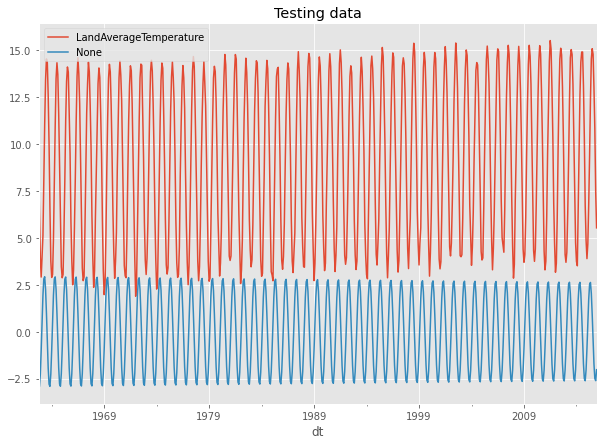

In [ ]:
test.plot(title = "Testing data")
y_pred_test.plot()
plt.legend()
plt.show()

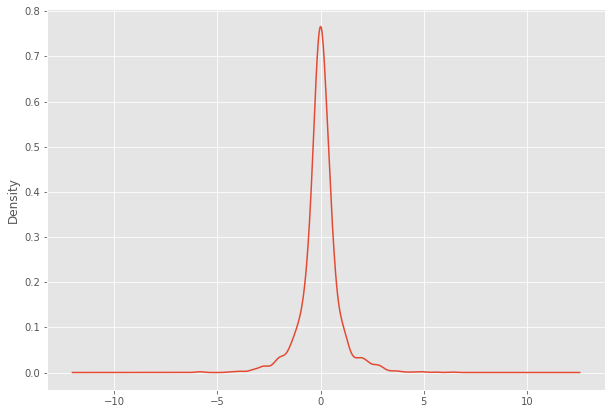

In [ ]:
residuals = model_fit.resid
residuals.plot(kind = "kde")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(test, y_pred_test)
 
print("MSE is :", mse)
 
print("RMSE is :", np.sqrt(mse))

MSE is : 98.85386926003595
RMSE is : 9.942528313262978


### <a id="homo">Predict 30 Future Values</a>

In [ ]:
df.head()

dt
1750-01-01     3.034
1750-02-01     3.083
1750-03-01     5.626
1750-04-01     8.490
1750-05-01    11.573
Name: LandAverageTemperature, dtype: float64

In [ ]:
model = ARIMA(df , order = (2,1,5))
 
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
forecast = model_fit.predict(start = len(df), end = len(df)+364)
forecast

2016-01-01   -1.451985
2016-02-01    0.463870
2016-03-01    1.865606
2016-04-01    2.812980
2016-05-01    2.936771
                ...   
2046-01-01   -0.970448
2046-02-01    0.474739
2046-03-01    1.792379
2046-04-01    2.629560
2046-05-01    2.762195
Freq: MS, Length: 365, dtype: float64

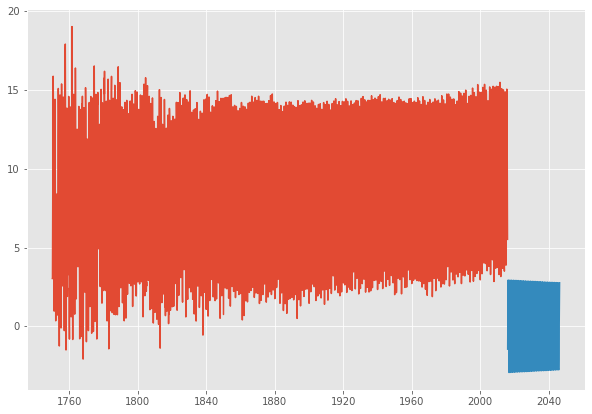

In [ ]:
plt.plot(df)
plt.plot(forecast)
plt.show()

**Interpretation :-** Above graph shows the trend of future value. From the graph we can say that the temperature fall down from the year 2016 to year 2040

Also we can forecast temperature by using resample method. Resample convert the data into Month, Year, Week, etc. And because of that we can forecast monthly, yearly and so on.

In [ ]:
df = pd.read_csv("GlobalLandTemperatures.csv", parse_dates = ["dt"], index_col = 'dt')

In [ ]:
df["LandAverageTemperature"] = df["LandAverageTemperature"].fillna(df["LandAverageTemperature"].mean())
 
df["LandAverageTemperatureUncertainty"] = df["LandAverageTemperatureUncertainty"].fillna(df["LandAverageTemperatureUncertainty"].mean())
 
df["LandMaxTemperature"] = df["LandMaxTemperature"].fillna(df["LandMaxTemperature"].mean())
 
df["LandMaxTemperatureUncertainty"] = df["LandMaxTemperatureUncertainty"].fillna(df["LandMaxTemperatureUncertainty"].mean())
 
df["LandMinTemperature"] = df["LandMinTemperature"].fillna(df["LandMinTemperature"].mean())
 
df["LandMinTemperatureUncertainty"] = df["LandMinTemperatureUncertainty"].fillna(df["LandMinTemperatureUncertainty"].mean())
 
df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].fillna(df["LandAndOceanAverageTemperature"].mean())
 
df["LandAndOceanAverageTemperatureUncertainty"] = df["LandAndOceanAverageTemperatureUncertainty"].fillna(df["LandAndOceanAverageTemperatureUncertainty"].mean())

In [ ]:
df.isna().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

### <a id="homo">Resample Data into Month</a>

In [ ]:
month = df.resample("M").mean()
month.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-31,3.034,3.574,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1750-02-28,3.083,3.702,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1750-03-31,5.626,3.076,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1750-04-30,8.490,2.451,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1750-05-31,11.573,2.072,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532


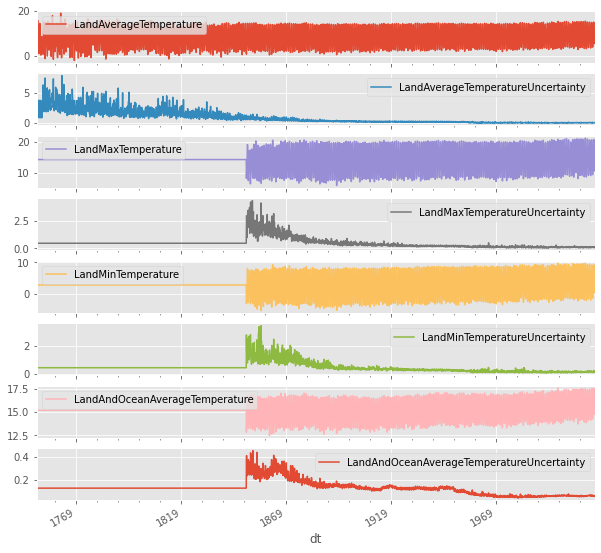

In [ ]:
month.plot(subplots = True, figsize = (10,10))
plt.show()

In [ ]:
fig = go.Figure([go.Scatter(x = month.index, 
                            y = month.LandAverageTemperature)])
fig.show()

In [ ]:
fig = px.bar(month, x = month.index, 
             y = "LandAverageTemperature")
fig.show()

In [ ]:
fig = px.line(month, x = month.index, 
              y = month.LandAverageTemperature, 
              title = 'Custum Tick Labels')
fig.update_xaxes(dtick = "M1")
fig.show()

 ### <a id="homo">Decomposition</a>

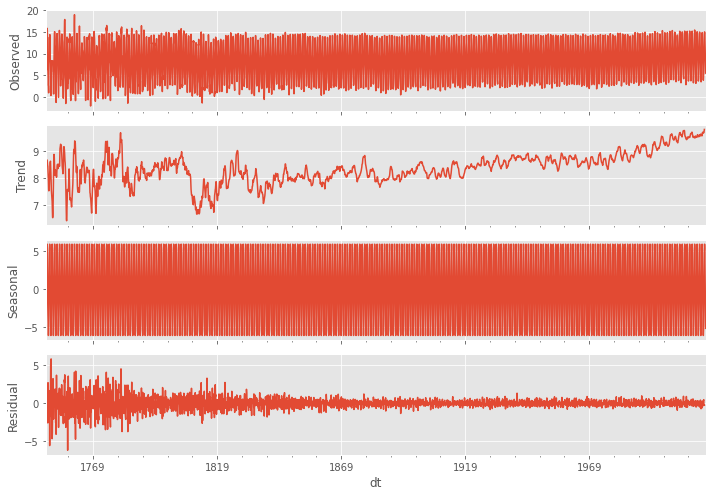

In [ ]:
decomposition = sm.tsa.seasonal_decompose(month["LandAverageTemperature"])
 
fig = decomposition.plot()

### <a id="homo">Stationarity</a>

Constant statistical properties -> mean, variance, std with does not change over time
 
 
H0 : It is Non Stationary
H1 : It is Stationary
 
        
P value > 0.05 Fail to reject null hypothesis -> Non Stationary 
 
 
P value < 0.05 it is Stationary

In [ ]:
output = adfuller(month["LandAverageTemperature"])
output

(-4.036039785872673,
 0.001233119577059826,
 29,
 3162,
 {'1%': -3.4324197712239393,
  '10%': -2.5672568084635663,
  '5%': -2.862454498112156},
 7457.668033159485)

In [ ]:
p_val = output[1]

In [ ]:
if p_val > 0.05:
    print("Non Stationary")
else:
    print("Stationary")

Stationary


***Conclusion :-*** P value is 0.001.. and from our hypothesis we can say our data column is stationary.

### For monthly forecast, repeat the steps from AR to Auto Arima with the minor changes.

### <a id="homo">Resample Data into Year</a>

In [ ]:
year = df.resample("Y").mean()
year.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.690644,2.496206,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1751-12-31,8.142221,2.013362,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1752-12-31,7.077282,1.957734,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1753-12-31,8.388083,3.176000,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1754-12-31,8.469333,3.494250,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532


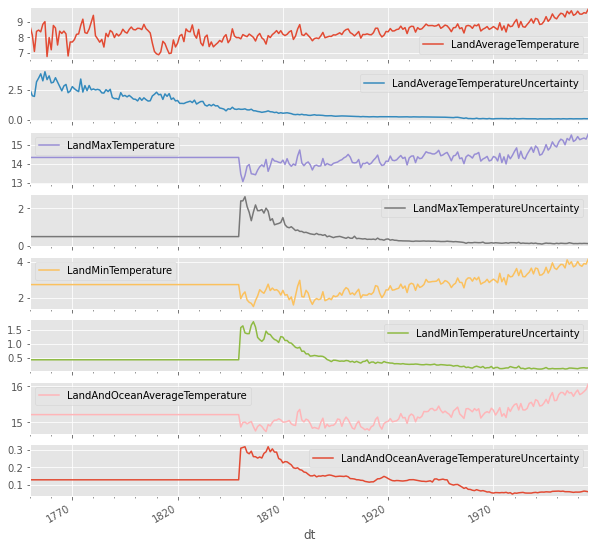

In [ ]:
year.plot(subplots = True, figsize = (10,10))
plt.show()

In [ ]:
fig = go.Figure([go.Scatter(x = year.index, 
                             y = year.LandAverageTemperature)])
fig.show()

In [ ]:
fig = px.bar(year, x = year.index, 
             y = "LandAverageTemperature")
fig.show()

In [ ]:
fig = px.line(year, x = year.index, 
              y = year.LandAverageTemperature, 
              title = 'Custum Tick Labels')
fig.update_xaxes(dtick = "M1")
fig.show()

### <a id="homo">Decomposition</a>

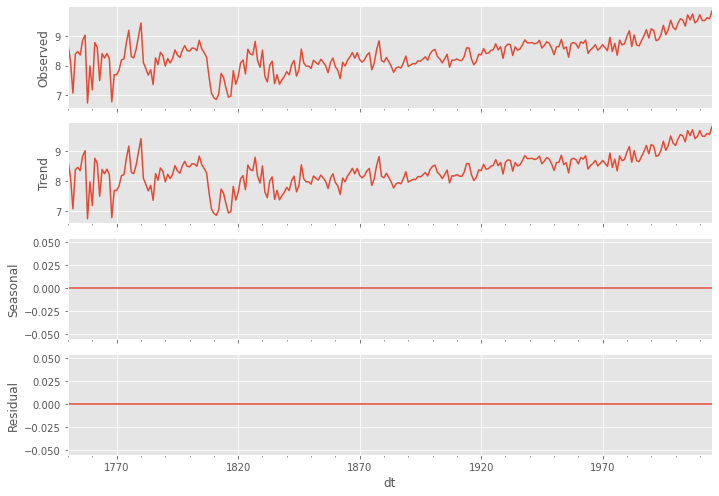

In [ ]:
decomposition = sm.tsa.seasonal_decompose(year["LandAverageTemperature"])
 
fig = decomposition.plot()

### <a id="homo">Stationarity</a>

Constant statistical properties -> mean, variance, std with does not change over time 

H0 : It is Non Stationary
H1 : It is Stationary
        
P value > 0.05 Fail to reject null hypothesis -> Non Stationary 

P value < 0.05 it is Stationary

In [ ]:
output = adfuller(year["LandAverageTemperature"])
output

(-0.8864293917075042,
 0.7924085576143398,
 12,
 253,
 {'1%': -3.4564641849494113,
  '10%': -2.572894516864816,
  '5%': -2.873032730098417},
 98.44937379415404)

In [ ]:
p_val = output[1]

In [ ]:
if p_val > 0.05:
    print("Non Stationary")
else:
    print("Stationary")

Non Stationary


**Conclusion :-** Here p value is 0.79 and which is greater than the 0.05. so from our hypothesis 3can say that for our yearly data column is not stationary.
 
Now, we have to convert it in stationary. As below,

In [ ]:
year["LandAverageTemperature_1"] = year["LandAverageTemperature"] - df["LandAverageTemperature"].shift(1)

In [ ]:
year = year.dropna()

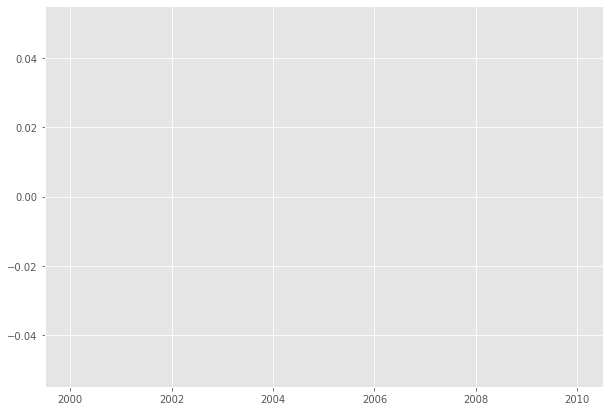

In [ ]:
plt.plot(year.index, year["LandAverageTemperature_1"])
plt.show()

**Conclusion :-** The graph is blank, because of size of yearly data. Our yearly data is very small, there are 216 rows only.

In [ ]:
output = adfuller(year["LandAverageTemperature_1"])

ValueError: ignored

**Conclusion :-** Above error arise because of sample size. Above syntax gives us error but when you run "output", it gives valid output.

In [ ]:
output

(-4.036039785872673,
 0.001233119577059826,
 29,
 3162,
 {'1%': -3.4324197712239393,
  '10%': -2.5672568084635663,
  '5%': -2.862454498112156},
 7457.668033159485)

In [ ]:
p_val = output[1]

In [ ]:
if p_val > 0.05:
    print("Non Stationary")
else:
    print("Stationary")

Stationary


**Conclusion :-** Now our data column becomes stationary.

### For yearly forecast, repeat the steps from AR to Auto Arima with the minor changes.